**1.Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix


**2.Load the Data**

In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/train_LZdllcl.csv')
test_data = pd.read_csv('/content/test_2umaH9m.csv')
sample_submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')


In [ ]:
# Display the first few rows of each dataset
print("Train Data:")
print(train_data.head())

Train Data:
   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0              

In [ ]:
print("\nTest Data:")
print(test_data.head())


Test Data:
   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5        

In [ ]:
print("\nSample Submission:")
print(sample_submission.head())


Sample Submission:
   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


3.Exploratory Data Analysis (EDA)


*   Analyze the data to understand distributions, null values, and correlations.



In [ ]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
        

In [ ]:
# Check for missing values
print("\nMissing values in train data:")
print(train_data.isnull().sum())


Missing values in train data:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


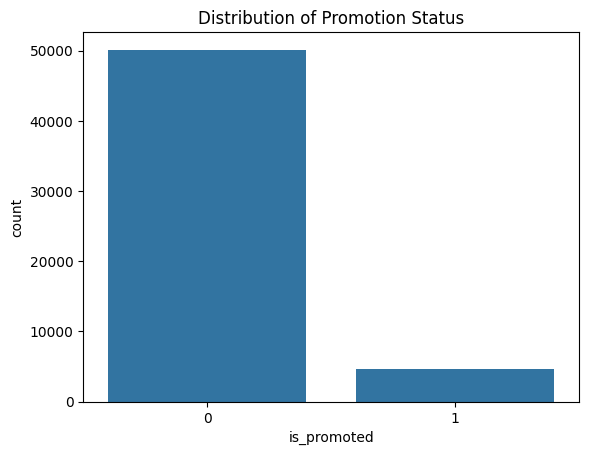

In [ ]:
# Visualize distribution of the target variable
sns.countplot(x='is_promoted', data=train_data)
plt.title('Distribution of Promotion Status')
plt.show()

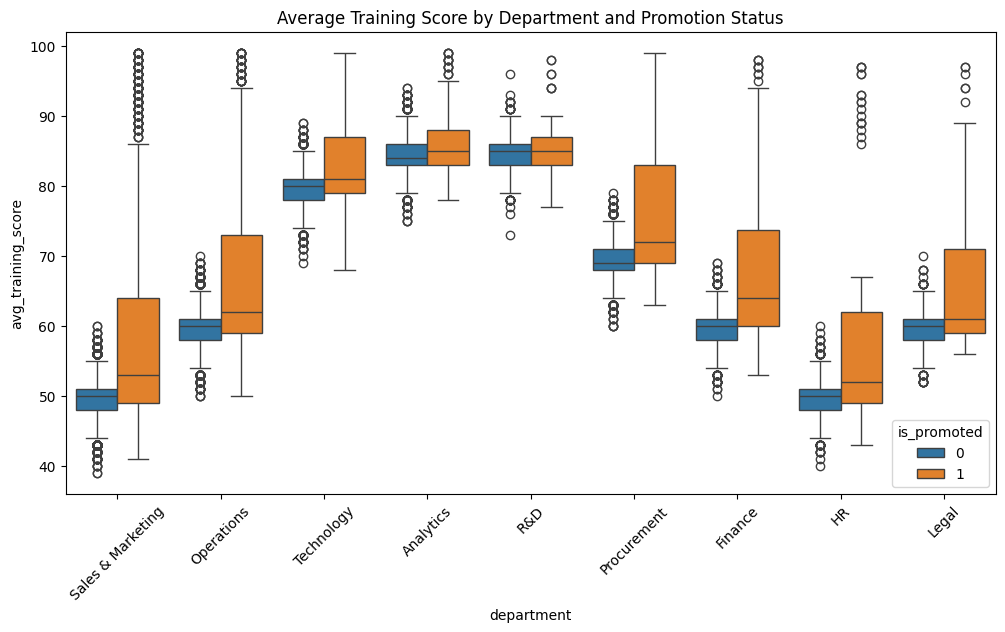

In [ ]:
# Visualize key features
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='avg_training_score', hue='is_promoted', data=train_data)
plt.title('Average Training Score by Department and Promotion Status')
plt.xticks(rotation=45)
plt.show()

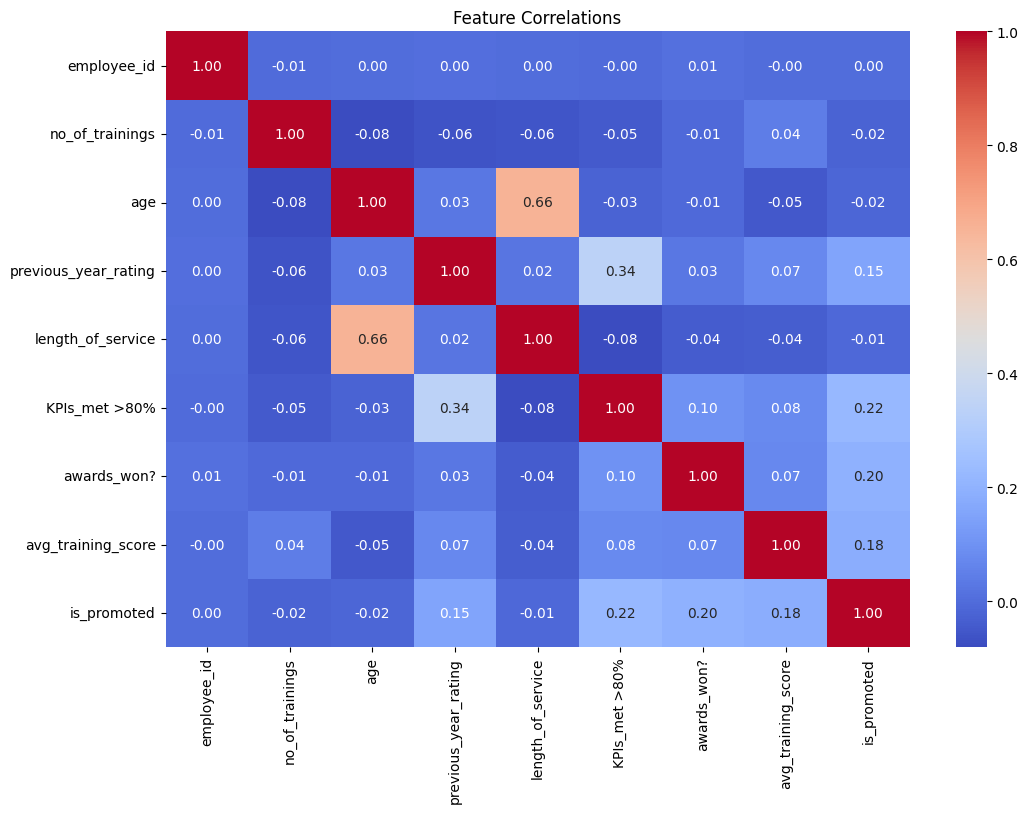

In [ ]:
# Select only numeric columns for correlation
numeric_columns = train_data.select_dtypes(include=[np.number]).columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()


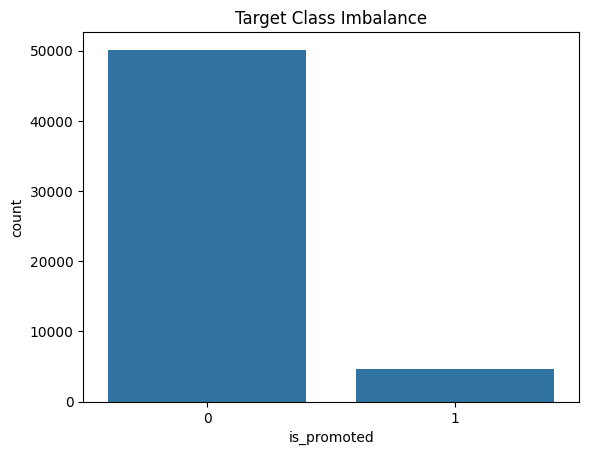

In [ ]:
# Check target imbalance
sns.countplot(x='is_promoted', data=train_data)
plt.title('Target Class Imbalance')
plt.show()

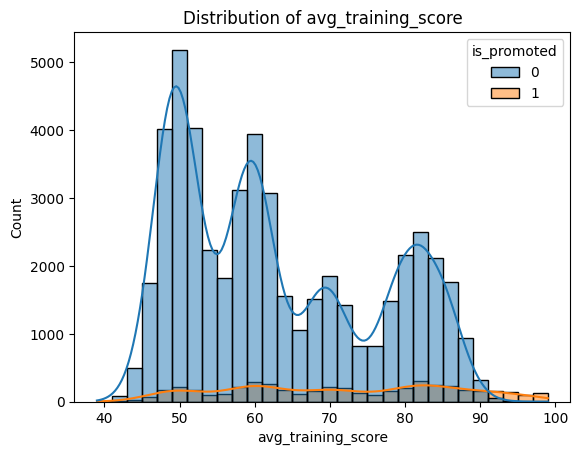

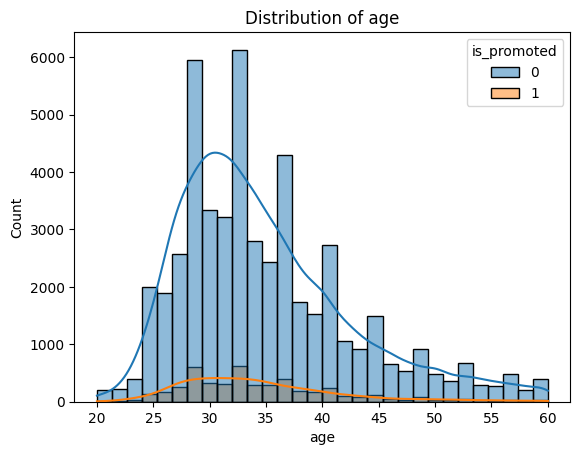

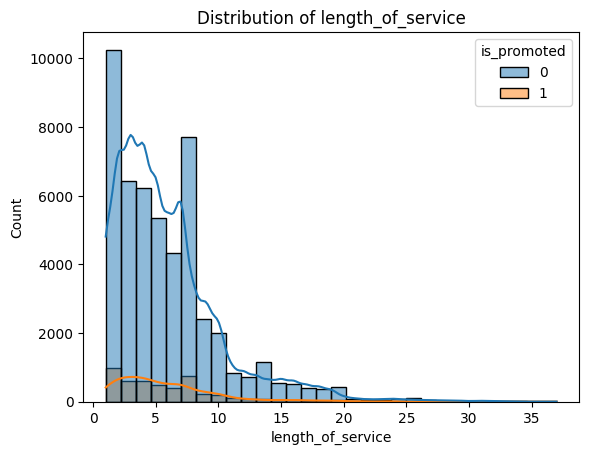

In [ ]:
# Visualize numeric distributions
for col in ['avg_training_score', 'age', 'length_of_service']:
    sns.histplot(data=train_data, x=col, hue='is_promoted', kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

**4.Data Preprocessing**

*   Handle missing values.
*   Convert categorical variables into numeric using encoding.




In [ ]:
# Fill missing values
columns_to_fill = ['previous_year_rating']
for col in columns_to_fill:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(test_data[col].median())

In [ ]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Impute missing values
num_cols = ['previous_year_rating']
cat_cols = ['education']

<ipython-input-56-f4055c8d2f0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['region'].fillna('Unknown', inplace=True)
<ipython-input-56-f4055c8d2f0a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


In [ ]:
train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])
test_data[num_cols] = num_imputer.transform(test_data[num_cols])

train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])
test_data[cat_cols] = cat_imputer.transform(test_data[cat_cols])

In [ ]:
# Ordinal encoding for high-cardinality features
ordinal_encoder = OrdinalEncoder()
train_data['region'] = ordinal_encoder.fit_transform(train_data[['region']])
test_data['region'] = ordinal_encoder.transform(test_data[['region']])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**5**.**Modeling**

In [ ]:
# Separate features and target
X = train_data.drop(['employee_id', 'is_promoted'], axis=1)
y = train_data['is_promoted']

In [ ]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate on validation set
y_pred = rf_model.predict(X_val)
print("F1 Score:", f1_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

F1 Score: 0.4371941272430669
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.84      0.30      0.44       908

    accuracy                           0.94     10962
   macro avg       0.89      0.65      0.70     10962
weighted avg       0.93      0.94      0.92     10962



**6.Fine-Tuning**

*   Perform hyperparameter tuning using GridSearchCV.



In [ ]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Final model
final_model = grid_search.best_estimator_

**7. Predictions and Submission**

*   Make predictions on the test data and prepare the submission file.



In [ ]:
# Predict on test data
test_data['is_promoted'] = final_model.predict(test_data.drop('employee_id', axis=1))


In [ ]:
# Prepare submission file
submission = sample_submission.copy()
submission['is_promoted'] = test_data['is_promoted']
submission.to_csv('final_submission.csv', index=False)
print("Submission file saved as final_submission.csv")

Submission file saved as final_submission.csv
